In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
df = pd.read_excel('/content/NEWDataJeera.xlsx')

In [ ]:
df

,Contrast,Energy,Homogeneity,Mean_R,Mean_G,Mean_B,Std_R,Std_G,Std_B,var_intensity,skewness,kurtosis,Height,Width,Color_Hist_1,Color_Hist_2,Color_Hist_3,Outcome
0,34.322744,0.017512,0.317423,143.654533,145.121898,118.907567,36.882742,36.473403,38.886577,1499.882329,-0.424689,-0.380918,1944,2592,0.000194,0.011374,0.000015,0
1,107.733327,0.017602,0.256402,144.093755,138.710550,144.876813,36.441492,38.036010,53.921360,1385.423674,-0.118446,-0.331482,1944,2592,0.000737,0.011441,0.000003,0
2,287.776200,0.012382,0.128639,151.113300,141.475900,138.531900,41.540650,46.204550,47.264750,2005.674000,0.122003,-0.332270,1944,2592,0.002127,0.007690,0.000006,1
3,187.629098,0.019082,0.201164,143.704990,134.484417,137.050818,39.514298,42.285556,38.268037,1336.217995,-0.378454,-0.006339,1944,2592,0.001033,0.011145,0.000133,0
4,208.488600,0.013543,0.149645,146.134300,137.070400,134.425400,41.149150,46.011700,47.707160,1985.712000,0.175707,-0.352230,1944,2592,0.001248,0.005958,0.000009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,165.090526,0.017429,0.171908,138.921764,133.837717,129.394925,30.078416,34.219133,50.802862,1375.026576,-0.008818,0.438206,1944,2592,0.000054,0.011972,0.000189,0
617,226.592503,0.017122,0.280422,150.238169,142.121006,131.971051,38.221799,40.036372,45.006470,1348.266343,0.278357,0.302798,1944,2592,0.000487,0.004422,0.000029,0
618,201.783101,0.018563,0.195675,137.552948,136.226131,135.136124,32.107050,42.066935,50.454037,1143.265922,0.046132,0.224874,1944,2592,0.000517,0.001022,0.000039,0
619,264.523400,0.012534,0.121353,158.577700,149.829900,148.126300,38.229710,43.111150,44.313090,1735.439000,-0.005580,-0.315700,1944,2592,0.000599,0.003151,0.000015,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [ ]:
#Smote
'''from imblearn.over_sampling import SMOTE

# Assuming X is your feature matrix and y is the target variable (Outcome)
smote = SMOTE()
x, y = smote.fit_resample(x, y)'''

'from imblearn.over_sampling import SMOTE\n\n# Assuming X is your feature matrix and y is the target variable (Outcome)\nsmote = SMOTE()\nx, y = smote.fit_resample(x, y)'

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Applying  Explainable AI (XAI) techniqupip install shapes

In [ ]:
pip install shap

In [ ]:
pip install lime

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
from lime import lime_tabular


In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

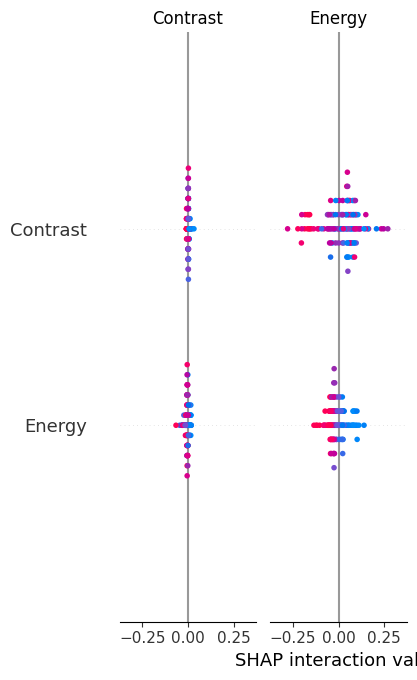

Shape of shap_values: (125, 17, 2)
Shape of explainer.expected_value: [0.62016129 0.37983871]


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (17, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
from lime import lime_tabular

# Step 1: Load data
df = pd.read_excel('/content/NEWDataJeera.xlsx')
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Step 2: Split and scale data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 3: Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Step 4: Explain Model with SHAP
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Global Interpretability with SHAP Summary Plot
# Check if shap_values is a list (multi-class case) or single array (binary/single-class case)
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], x_test, feature_names=x.columns)  # For multi-class or binary, using class 1
else:
    shap.summary_plot(shap_values, x_test, feature_names=x.columns)

# Step 5: Local Interpretation for a Specific Prediction with SHAP
# Selecting a single instance (e.g., instance 0) and class
instance_idx = 0  # Index of the instance to explain
class_idx = 1  # Class index for binary classification (1 for the positive class)

# Display the shapes of shap_values and expected_value for debugging
print(f"Shape of shap_values: {[s.shape for s in shap_values] if isinstance(shap_values, list) else shap_values.shape}")
print(f"Shape of explainer.expected_value: {explainer.expected_value}")

# Extract SHAP values and base value for a single instance and class
if isinstance(shap_values, list):  # For multi-class case
    single_shap_values = shap_values[class_idx][instance_idx]
    single_base_value = explainer.expected_value[class_idx]
else:  # For single class or binary classification
    single_shap_values = shap_values[instance_idx]
    single_base_value = explainer.expected_value

# Generate the waterfall plot
shap.waterfall_plot(shap.Explanation(
    values=single_shap_values,
    base_values=single_base_value,
    data=x_test[instance_idx],
    feature_names=x.columns))

# Step 6: Explain Model with LIME for a Single Instance (Optional)
# Initialize the LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(x_train, feature_names=x.columns, class_names=['0', '1'], mode='classification')

# Explain a single prediction (e.g., the first instance in the test set)
explanation = lime_explainer.explain_instance(x_test[instance_idx], model.predict_proba)
explanation.show_in_notebook()


SHAP values shape: (125, 17, 2)
Expected value shape: (2,)


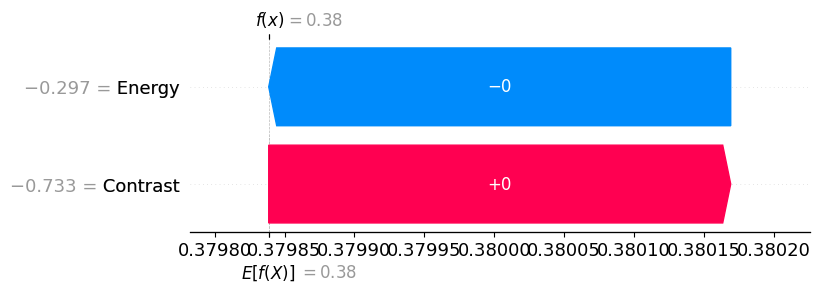


Feature Contributions:
Contrast: 0.0003
Energy: -0.0003


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import shap
from lime import lime_tabular
import numpy as np

# Step 1: Load data
df = pd.read_excel('/content/NEWDataJeera.xlsx')
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Step 2: Split and scale data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 3: Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Step 4: Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Step 5: Calculate SHAP values for a single instance
instance_idx = 0
shap_values = explainer.shap_values(x_test)

# Print shapes for debugging
print("SHAP values shape:", np.array(shap_values).shape)
print("Expected value shape:", np.array(explainer.expected_value).shape)

# Create waterfall plot for binary classification
# For binary classification, we'll use class 1 (positive class)
instance_shap_values = shap_values[1][instance_idx]  # Get SHAP values for positive class
instance_expected_value = explainer.expected_value[1]  # Get expected value for positive class

# Create explanation object correctly
explanation = shap.Explanation(
    values=instance_shap_values,  # SHAP values for single instance
    base_values=instance_expected_value,  # Expected value for positive class
    data=x_test[instance_idx],  # Feature values for the instance
    feature_names=list(x.columns)  # Feature names
)

# Generate waterfall plot
shap.waterfall_plot(explanation)

# Optional: Print feature contributions
print("\nFeature Contributions:")
for fname, fvalue in zip(x.columns, instance_shap_values):
    print(f"{fname}: {fvalue:.4f}")

In [ ]:
# This here ( explainable AI (XAI) techniques)

In [ ]:
# BOA Parameters
population_size = 20  # Number of butterflies
iterations = 10  # Number of iterations
a = 0.01  # Sensory modality
c = 0.01  # Constant for butterfly movement
p = 0.8  # Probability for butterfly's movement

In [ ]:
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize random hyperparameters (Butterfly positions)
butterflies = np.random.randint(10, 200, size=(population_size, 3))  # Random hyperparameter sets

# Fitness function (objective function to maximize)
def fitness_function(hyperparameters):
    n_estimators, max_depth, min_samples_split = hyperparameters

    # Train Random Forest Classifier with these hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 random_state=42)
    clf.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(x_test)

    # Calculate accuracy as fitness score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, clf  # Returning both accuracy and the trained classifier

In [ ]:
# BOA Optimization Loop
best_hyperparameters = None
best_fitness = 0
best_classifier = None

for iteration in range(iterations):
    for i in range(population_size):
        # Calculate fitness for each butterfly
        fitness, clf = fitness_function(butterflies[i])

        # Update the best solution if current one is better
        if fitness > best_fitness:
            best_fitness = fitness
            best_hyperparameters = butterflies[i]
            best_classifier = clf

        # Update butterfly's position using the BOA formula
        for j in range(3):  # Update each hyperparameter
            if np.random.random() > p:
                # Global search
                butterflies[i][j] += a * butterflies[i][j] * np.random.randn()
            else:
                # Local search
                butterflies[i][j] += c * (best_hyperparameters[j] - butterflies[i][j]) * np.random.randn()

    print(f"Iteration {iteration+1}/{iterations}, Best Accuracy: {best_fitness:.4f}")

# Final optimal hyperparameters
print(f"Best Hyperparameters found: {best_hyperparameters}")

Iteration 1/10, Best Accuracy: 0.9760
Iteration 2/10, Best Accuracy: 0.9760
Iteration 3/10, Best Accuracy: 0.9760
Iteration 4/10, Best Accuracy: 0.9760
Iteration 5/10, Best Accuracy: 0.9760
Iteration 6/10, Best Accuracy: 0.9760
Iteration 7/10, Best Accuracy: 0.9760
Iteration 8/10, Best Accuracy: 0.9760
Iteration 9/10, Best Accuracy: 0.9760
Iteration 10/10, Best Accuracy: 0.9760
Best Hyperparameters found: [132  55  17]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
y_pred_proba = best_classifier.predict_proba(x_test)[:, 1]

AUC-ROC Score: 0.9983


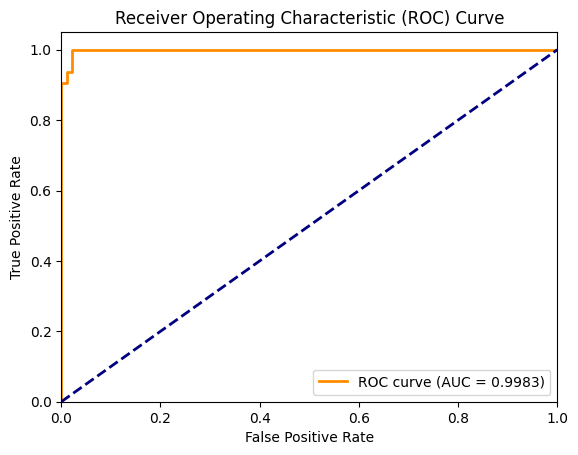

In [ ]:
# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc:.4f}")

# --- Plotting the ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
 [[91  2]
 [ 3 29]]
Accuracy: 0.9600
Precision: 0.9355
Recall: 0.9062
F1-Score: 0.9206


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.94      0.91      0.92        32

    accuracy                           0.96       125
   macro avg       0.95      0.94      0.95       125
weighted avg       0.96      0.96      0.96       125



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Split features and target
X = df.drop(['Outcome'], axis=1)  # Features
y = df['Outcome']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# BOA Parameters
population_size = 20  # Number of butterflies
iterations = 20  # Number of iterations
a = 0.01  # Sensory modality
c = 0.01  # Constant for butterfly movement
p = 0.8  # Probability for butterfly's movement

# Initialize random hyperparameters (Butterfly positions)
# Hyperparameters: [n_estimators, max_depth, min_samples_split]
butterflies = np.random.randint(10, 200, size=(population_size, 3))  # Random hyperparameter sets

# Fitness function (objective function to maximize)
def fitness_function(hyperparameters):
    n_estimators, max_depth, min_samples_split = hyperparameters

    # Train Random Forest Classifier with these hyperparameters
    clf = RandomForestClassifier(n_estimators=int(n_estimators),
                                 max_depth=int(max_depth),
                                 min_samples_split=int(min_samples_split),
                                 random_state=42)
    clf.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy as fitness score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
# BOA Optimization Loop
best_hyperparameters = None
best_fitness = 0

for iteration in range(iterations):
    for i in range(population_size):
        # Calculate fitness for each butterfly
        fitness = fitness_function(butterflies[i])

        # Update the best solution if the current one is better
        if fitness > best_fitness:
            best_fitness = fitness
            best_hyperparameters = butterflies[i]

        # Update butterfly's position using the BOA formula
        for j in range(3):  # Update each hyperparameter
            if np.random.random() > p:
                # Global search
                butterflies[i][j] += a * butterflies[i][j] * np.random.randn()
            else:
                # Local search
                butterflies[i][j] += c * (best_hyperparameters[j] - butterflies[i][j]) * np.random.randn()

    print(f"Iteration {iteration+1}/{iterations}, Best Accuracy: {best_fitness:.4f}")

# Final optimal hyperparameters
print(f"Best Hyperparameters found: {best_hyperparameters}")

Iteration 1/20, Best Accuracy: 0.9840
Iteration 2/20, Best Accuracy: 0.9840
Iteration 3/20, Best Accuracy: 0.9840
Iteration 4/20, Best Accuracy: 0.9840
Iteration 5/20, Best Accuracy: 0.9840
Iteration 6/20, Best Accuracy: 0.9840
Iteration 7/20, Best Accuracy: 0.9840
Iteration 8/20, Best Accuracy: 0.9840
Iteration 9/20, Best Accuracy: 0.9840
Iteration 10/20, Best Accuracy: 0.9840
Iteration 11/20, Best Accuracy: 0.9840
Iteration 12/20, Best Accuracy: 0.9840
Iteration 13/20, Best Accuracy: 0.9840
Iteration 14/20, Best Accuracy: 0.9840
Iteration 15/20, Best Accuracy: 0.9840
Iteration 16/20, Best Accuracy: 0.9840
Iteration 17/20, Best Accuracy: 0.9840
Iteration 18/20, Best Accuracy: 0.9840
Iteration 19/20, Best Accuracy: 0.9840
Iteration 20/20, Best Accuracy: 0.9840
Best Hyperparameters found: [ 17  43 107]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
y_pred_proba = best_classifier.predict_proba(x_test)[:, 1]

AUC-ROC Score: 0.9987


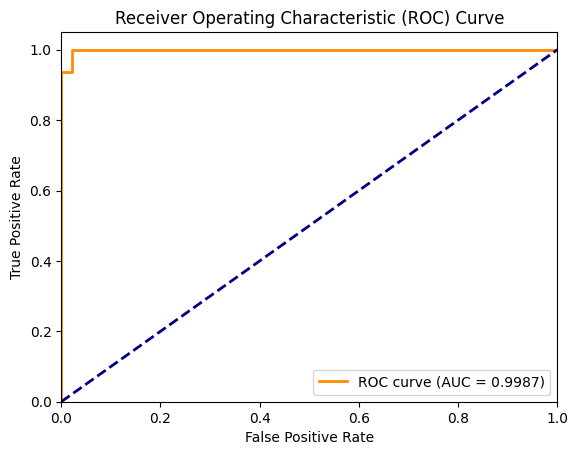

In [ ]:
# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc:.4f}")

# --- Plotting the ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
# Confusion Matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
 [[91  2]
 [ 0 32]]
Accuracy: 0.9840
Precision: 0.9412
Recall: 1.0000
F1-Score: 0.9697


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.94      1.00      0.97        32

    accuracy                           0.98       125
   macro avg       0.97      0.99      0.98       125
weighted avg       0.98      0.98      0.98       125



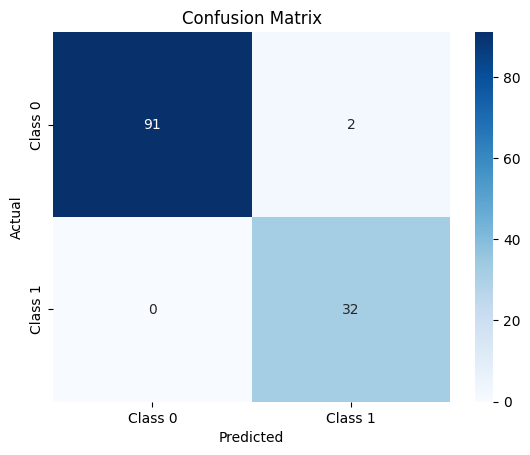

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from imblearn.over_sampling import ADASYN, RandomOverSampler

# ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Random Over Sampler
#ros = RandomOverSampler(random_state=42)
#X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)